In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Implementation of the equations 1,2,3



$$P_i (t)=P_i(t-1) exp(R_i (t))$$
$$R_i(t)=\frac{1}{N_i^*} \sum_{j \neq i}^N \alpha_{i j} \Theta\left(R_j^{c u m}(t-1)>R_C\right) \times R_j^{c u m}(t-1) \beta_{i j}+\eta_i(t), \quad (1)$$
$$R_j^{c u m}(t)=\left(1-\Theta\left(R_j^{c u m}(t-1)>R_C\right)\right)\left[R_j^{c u m}(t-1)+R_j(t)\right] \qquad (2)$$
$$N_i^*=\sum_{j \neq i}^N \Theta\left(R_j^{c u m}(t-1)>R_C\right), \alpha_{i j}=1-\exp \left\{-K_j /\left(K_i \gamma\right)\right\} \qquad (3)$$
$$\beta_{i j}=\exp \left\{-\left(z_i-z_j\right) / \tau\right\}$$


Vectorial:
if we have the information of $R^{cum}$ at hand we can use the power of the vectorial reduction to speed up computation,
we can write equation number (1) as follows:
$$R N^{tr}=(\alpha.*\beta-diag(\alpha.*\beta)).(\Theta(R^{cum}(t-1)\geq RC\mathbb{I}).*R^{cum}(t-1))+\eta$$

- tr: transpose \
- .* :means term by term product \
- $\alpha$ and $\beta$ are represented by matrixes, 
- and $R^{cum}(t)$ is a vector$\forall t  $, ie R^{cum} is a matrixes each line represent a specific date, and - each colomns  \, 
- and $\Theta$ represents both the scalar and the vectorial Hieveside function over $\mathbb{R^n}\
- \rightarrow\mathbb{R^n}$, where n can also be equal to 1

This leads to  the Vectorial equation:
$$R=(\alpha.*\beta-diag(\alpha.*\beta)).(\Theta(R^{cum}(t-1)\geq RC\mathbb{I}).*R^{cum}(t-1))./N+\eta$$
where ./ is the invert term by term 

$$R=((\alpha.*\beta).*(1-I_n)).(\Theta(R^{cum}(t-1)\geq RC\mathbb{I}).*R^{cum}(t-1))./N+\eta$$

This is an example of vectorial implenntation of equation number (1)

In [45]:
Hievisied=lambda r,r_critic:1*(r>=r_critic)
ReturnFunction=lambda t,alpha,beta,Rcum,critic,N:(alpha*beta*(1-np.eye(len(alpha))))@((Hievisied(Rcum[t-1],critic)*Rcum[t-1])/N)

In [95]:
#Tests we suppose that we have oly tree indices to see if the computation works
alpha=np.array([[2,3,4],[4,5,6],[6,8,9]])
betaMatrix=np.array([[1,7,4],[2,2,1],[6,1,2]])
rcritic=0.5
Rcum=np.random.rand(300,3)
#each line represent a time 
N=np.array([5,4,3])
Return=np.array([ReturnFunction(t,alpha,betaMatrix,Rcum,rcritic,N) for t in range(len(Rcum))])

In [96]:
print("alpha: "+str(alpha.shape))
print("beta: "+str(betaMatrix.shape))
print("Rcum: "+str(Rcum.shape))
print("N: "+str(N.shape))
print("Return: "+str(Return.shape))


alpha: (3, 3)
beta: (3, 3)
Rcum: (300, 3)
N: (3,)
Return: (300, 3)


In [67]:
Return[:20]
#the first 20 returns

array([[0.        , 0.        , 0.        ],
       [4.17317531, 0.        , 1.58978107],
       [0.        , 1.52835621, 6.87760297],
       [0.        , 0.        , 0.        ],
       [0.        , 1.14845992, 5.16806962],
       [4.75941467, 0.        , 1.81311035],
       [0.        , 1.11217735, 5.00479809],
       [7.88491076, 1.56200682, 1.41697495],
       [5.24497048, 1.96686393, 0.        ],
       [6.16334123, 2.60199043, 6.97333168],
       [4.3921212 , 3.12261989, 6.64008496],
       [4.83975974, 1.8149099 , 0.        ],
       [2.94939841, 2.36059846, 5.64558323],
       [7.50483287, 2.87579855, 6.51665986],
       [7.80898352, 1.32171905, 1.63215215],
       [0.        , 0.        , 0.        ],
       [0.        , 1.4231737 , 6.40428167],
       [5.04654184, 0.        , 1.92249213],
       [4.60759174, 0.94744272, 6.01876528],
       [5.13846785, 1.92692544, 0.        ]])

Text(0.5, 1.0, 'Hievised Fynction for critical value=3')

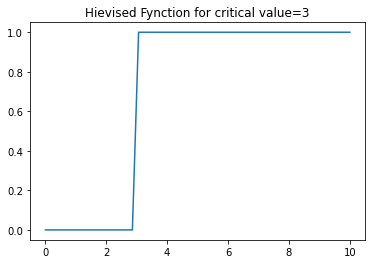

In [64]:
critic=3
a=np.linspace(0,10)
plt.plot(a,Hievisied(a,critic))
plt.title("Hievised Fynction for critical value={}".format(critic))

Unfortunately we cant use vectorial for of computation due to the metual dependence between the equations, that's why we need to use iterative computation, 

In [68]:
timezone={
    #This is just an example, 
    #TODO, fill this dictionarry with the real dat
    #index:timezone
    0:2,
    1:5,
    2:-2
}


$$\beta_{i j}=\exp \left\{-\left(z_i-z_j\right) / \tau\right\}$$

In [93]:
tho=3
betaFunction=lambda i,j:np.exp(-abs(timezone[i]-timezone[j])/tho)

In [94]:
BetaMatrix=np.array([[betaFunction(i,j) for j in timezone] for i in timezone])
BetaMatrix

array([[1.        , 0.36787944, 0.26359714],
       [0.36787944, 1.        , 0.09697197],
       [0.26359714, 0.09697197, 1.        ]])